<a href="https://colab.research.google.com/github/sarjakpatel/SJSU/blob/main/CMPE%20255/Assignment%202/Dimension_Reduction_Techniques_Tabular_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 255 : Dimensionality Reduction Techniques on Tabular Data

## Importing the Libraries

In [ ]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

from collections import OrderedDict
from functools import partial
from time import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold

plt.style.use('ggplot')

## Loading the Dataset

In [ ]:
wine_data=datasets.load_wine()
data = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
X= data.values
y= wine_data.target
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
X.shape, y.shape

((178, 13), (178,))

## Principle Component Analysis(PCA)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler =  StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
pca_full = PCA(n_components = 13)
data_embeddings_pca_full = pca_full.fit_transform(X_scaled)

In [ ]:
print('Variance explained by 13 features = ', sum(pca_full.explained_variance_ratio_*100))

Variance explained by 13 features =  100.00000000000003


Text(0, 0.5, 'Explained Variance')

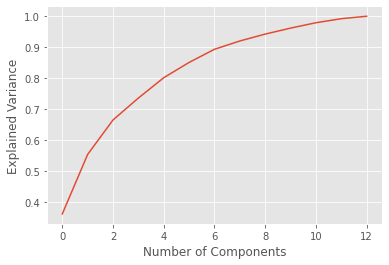

In [ ]:
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

In [ ]:
print('Variance captured by the 1 Component = ', np.cumsum(pca_full.explained_variance_ratio_ * 100)[0])
print('Variance captured by the 5 Components = ', np.cumsum(pca_full.explained_variance_ratio_ * 100)[4])
print('Variance captured by the 10 Components = ', np.cumsum(pca_full.explained_variance_ratio_ * 100)[9])

Variance captured by the 1 Component =  36.198848099926366
Variance captured by the 5 Components =  80.1622927555479
Variance captured by the 10 Components =  96.16971684450644


In [ ]:
pca_2 = PCA(n_components = 2)
data_embeddings_pca_2 = pca_2.fit_transform(X_scaled)

In [ ]:
print('Variance captured by 2 Components = ', np.cumsum(pca_2.explained_variance_ratio_ * 100)[1])

Variance captured by 2 Components =  55.406338356935336


Text(0, 0.5, 'Second Principal Component')

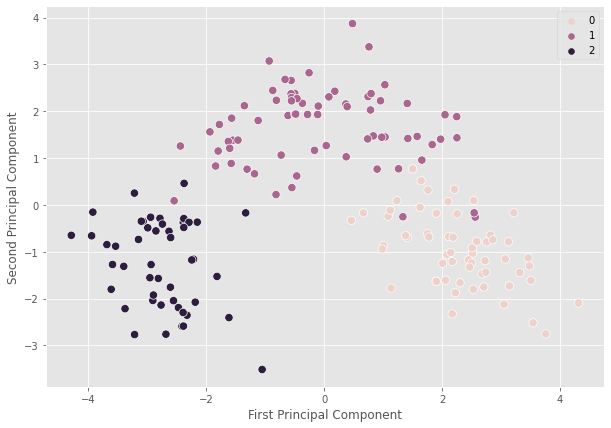

In [ ]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = data_embeddings_pca_2[:, 0], y = data_embeddings_pca_2[:, 1], s = 70, hue = y)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [ ]:
pca_3 = PCA(3)
data_embeddings_pca_3 = pca_3.fit_transform(X_scaled)

In [ ]:
print('Variance captured by 3 Components = ', np.cumsum(pca_3.explained_variance_ratio_ * 100)[2])

Variance captured by 3 Components =  66.52996889318527


In [ ]:
graph_pca = px.scatter_3d(
    data_embeddings_pca_3, x=0, y=1, z=2, color=y
)
graph_pca.update_traces(marker_size=3)

## Singular Value Decomposition (SVD)

In [ ]:
from sklearn.decomposition import TruncatedSVD

truncated_svd_full =  TruncatedSVD(n_components = 12)
data_embeddings_svd_full = truncated_svd_full.fit_transform(X)

In [ ]:
print('Variance captured by all features = ', sum(truncated_svd_full.explained_variance_ratio_*100))

Variance captured by all features =  99.99999162384984


Text(0, 0.5, 'Explained Variance')

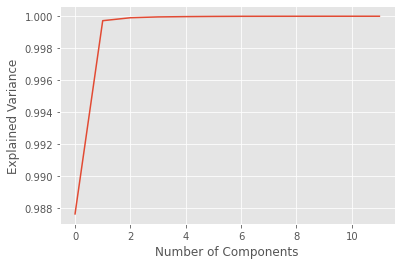

In [ ]:
plt.plot(np.cumsum(truncated_svd_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

In [ ]:
print('Variance captured by the 1 component = ', np.cumsum(truncated_svd_full.explained_variance_ratio_ * 100)[0])
print('Variance captured by the 5 components = ', np.cumsum(truncated_svd_full.explained_variance_ratio_ * 100)[4])
print('Variance captured by the 10 components = ', np.cumsum(truncated_svd_full.explained_variance_ratio_ * 100)[9])

Variance captured by the 1 component =  98.76618769163069
Variance captured by the 5 components =  99.99770558876195
Variance captured by the 10 components =  99.99993072631807


In [ ]:
truncated_svd_2 =  TruncatedSVD(n_components = 2)
data_embeddings_svd_2 = truncated_svd_2.fit_transform(X)

In [ ]:
print('Variance captured by 2 features = ', sum(truncated_svd_2.explained_variance_ratio_*100))

Variance captured by 2 features =  99.97221592711512


Text(0, 0.5, 'SVD Feature 2')

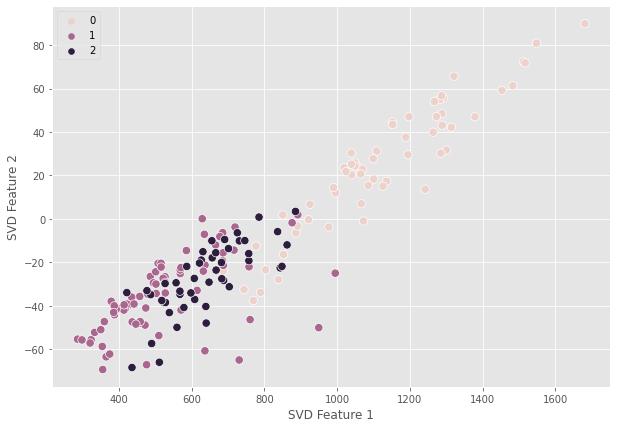

In [ ]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = data_embeddings_svd_2[:, 0], y = data_embeddings_svd_2[:, 1], s = 70, hue = y)

plt.xlabel('SVD Feature 1')
plt.ylabel('SVD Feature 2')

In [ ]:
truncated_svd_3 =  TruncatedSVD(n_components = 3)
data_embeddings_svd_3 = truncated_svd_3.fit_transform(X)

In [ ]:
print('Variance captured by 3 Components = ', np.cumsum(truncated_svd_3.explained_variance_ratio_ * 100)[2])

Variance captured by 3 Components =  99.99061323988951


In [ ]:
graph = px.scatter_3d(
    data_embeddings_svd_3, x=0, y=1, z=2, color=y
)
graph.update_traces(marker_size=3)

## Locally Linear Embedding (LLE)



In [ ]:
lle_2= LocallyLinearEmbedding(n_components = 2, n_neighbors=10)
data_embeddings_lle_2 = lle_2.fit_transform(X)

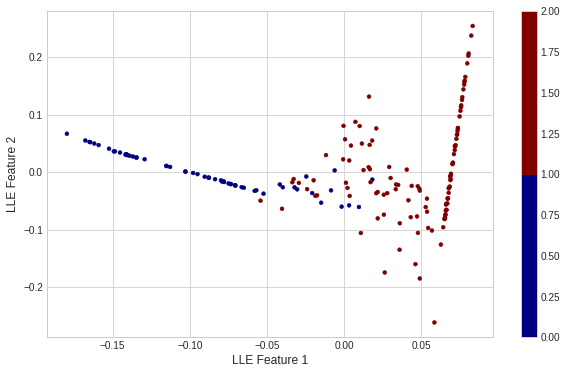

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 2)
plt.scatter(data_embeddings_lle_2[:, 0], data_embeddings_lle_2[:, 1], s = 15, cmap = c_map , c = y)
plt.colorbar()
plt.xlabel('LLE Feature 1') , plt.ylabel('LLE Feature 2')
plt.show()

In [ ]:
lle_3 = LocallyLinearEmbedding(n_components = 3, n_neighbors=10)
data_embeddings_lle_3 = lle_3.fit_transform(X)

In [ ]:
graph_lle = px.scatter_3d(
     data_embeddings_lle_3, x=0, y=1, z=2, color=y
)
graph_lle.update_traces(marker_size=3)

## t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [ ]:
from sklearn.manifold import TSNE

tsne_2 = TSNE()
data_embeddings_tsne_2 = tsne_2.fit_transform(X)

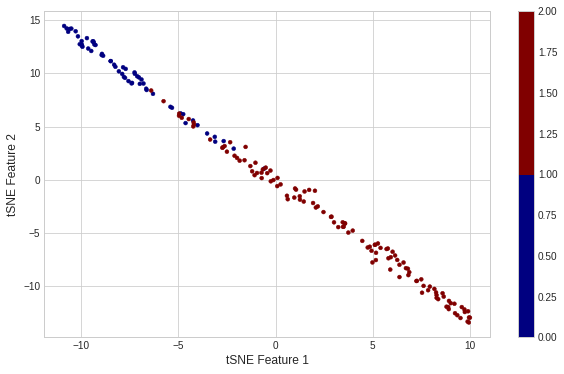

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 2)
plt.scatter(data_embeddings_tsne_2[:, 0], data_embeddings_tsne_2[:, 1], s = 15, cmap = c_map , c = y)
plt.colorbar()
plt.xlabel('tSNE Feature 1') , plt.ylabel('tSNE Feature 2')
plt.show()

In [ ]:
tsne_3 = TSNE(n_components=3)
data_embeddings_tsne_3 = tsne_3.fit_transform(X)

In [ ]:
graph_tsne = px.scatter_3d(
     data_embeddings_tsne_3, x=0, y=1, z=2, color=y
)
graph_tsne.update_traces(marker_size=3)

## Isometric Mapping (ISOMAP)

In [ ]:
from sklearn.manifold import Isomap

isomap_2 = Isomap(n_components = 2, n_neighbors=10)
data_embeddings_isomap_2 = isomap_2.fit_transform(X)

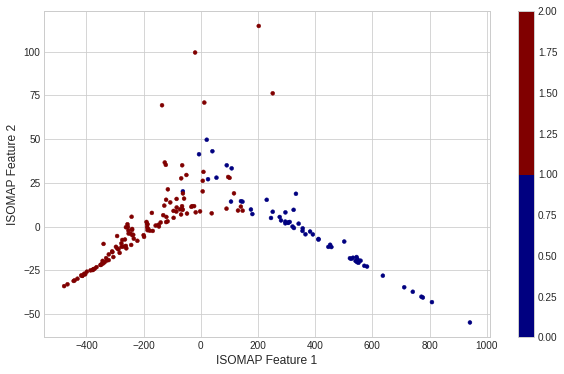

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 2)
plt.scatter(data_embeddings_isomap_2[:, 0], data_embeddings_isomap_2[:, 1], s = 15, cmap = c_map , c = y)
plt.colorbar()
plt.xlabel('ISOMAP Feature 1') , plt.ylabel('ISOMAP Feature 2')
plt.show()

In [ ]:
isomap_3 = Isomap(n_components = 3, n_neighbors=10)
data_embeddings_isomap_3 = isomap_3.fit_transform(X)

In [ ]:
graph_isomap = px.scatter_3d(
     data_embeddings_isomap_3, x=0, y=1, z=2, color=y
)
graph_isomap.update_traces(marker_size=3)

## Uniform Manifold Approximation and Projection (UMAP)

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 4.0 MB/s 
     |████████████████████████████████| 1.1 MB 31.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=1455f6b89a592a2e9b348ea1a582759373a37d49baaf0e45281c4b66343f446e
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=707a6241f5bdfdd248ed92e40010f384d460c8630ef50dbd14d5cb0af28ea159
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
import umap

In [ ]:
umap_2= umap.UMAP(n_neighbors=5, random_state=0)
data_embeddings_umap_2 = umap_2.fit(X)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



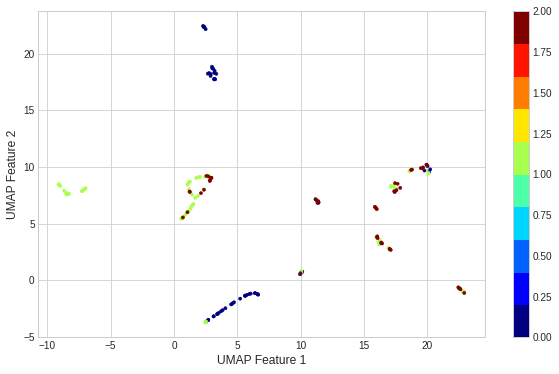

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(data_embeddings_umap_2.embedding_[:, 0], data_embeddings_umap_2.embedding_[:, 1], s = 10, cmap=c_map , c = y)
plt.colorbar()
plt.xlabel('UMAP Feature 1') , plt.ylabel('UMAP Feature 2')
plt.show()

In [ ]:
umap_3 = umap.UMAP(n_components = 3, n_neighbors=10, random_state = 0)
data_embeddings_umap_3 = umap_3.fit_transform(X)

In [ ]:
graph_umap = px.scatter_3d(
    data_embeddings_umap_3, x=0, y=1, z=2, color=y
)
graph_umap.update_traces(marker_size=3)

## Comparing the Results of 6 Dimensionality Reduction Techniques

In [ ]:
from time import time
from itertools import zip_longest

In [ ]:
n_neighbors = 10
embeddings = {
    "PCA" : PCA(n_components=2),
    "Truncated SVD embedding": TruncatedSVD(n_components=2),
    "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components=2),
    "Standard LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="standard"
    ),
    "t-SNE embeedding": TSNE(
        n_components=2, random_state=0
    ),
    "UMAP" :  umap.UMAP(n_neighbors=10, random_state=0)
}

In [ ]:
projections, timing = {}, {}
for name, transformer in embeddings.items():
  data = X
  print(f"Computing {name}...")
  start_time = time()
  projections[name] = transformer.fit_transform(data, y)
  timing[name] = time() - start_time

Computing PCA...
Computing Truncated SVD embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing t-SNE embeedding...
Computing UMAP...


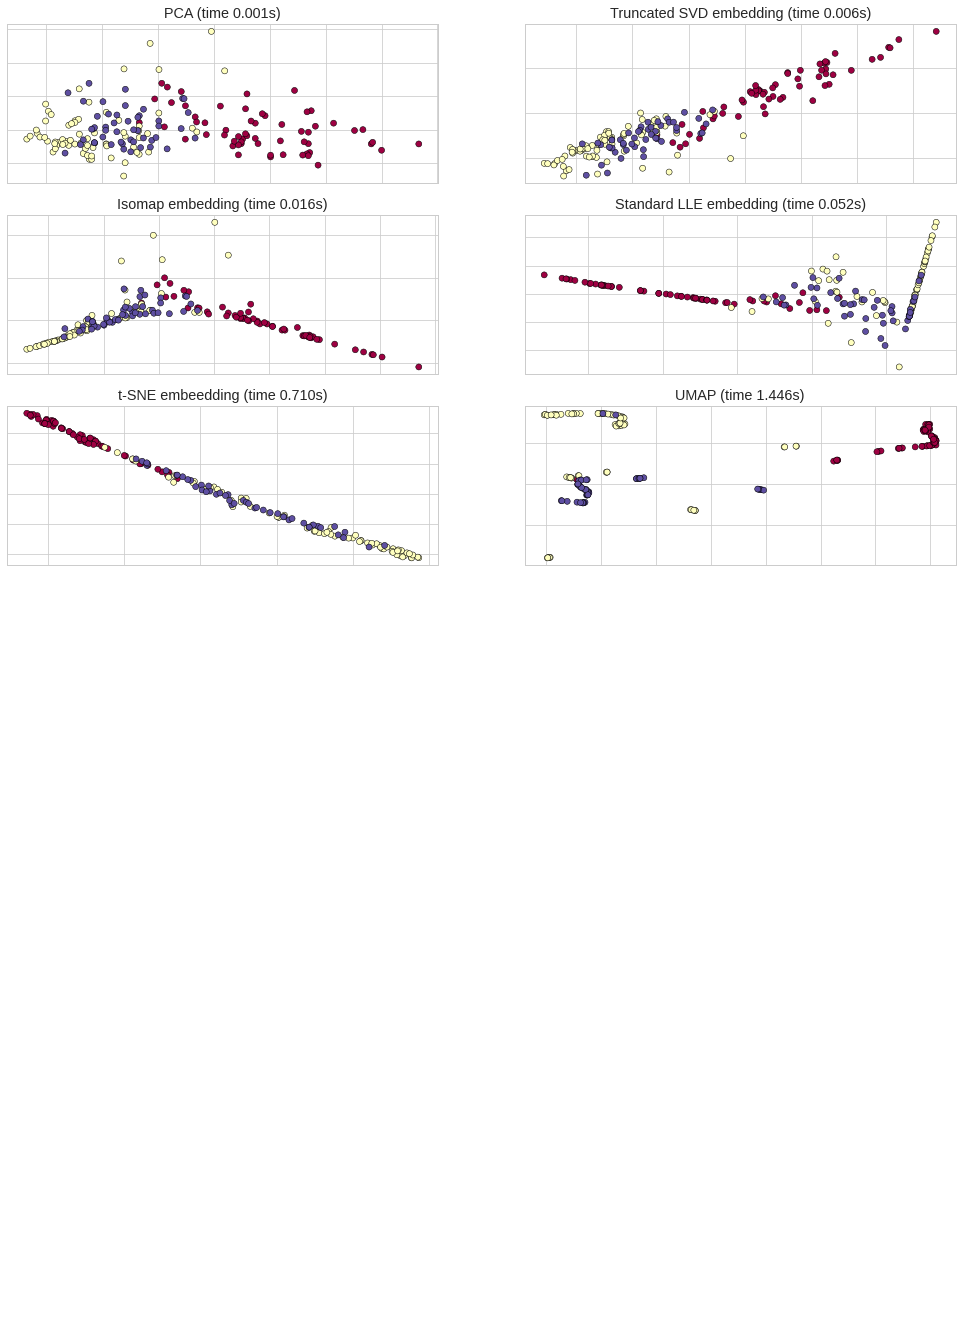

In [ ]:
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(17, 24))

for name, ax in zip_longest(timing, axs.ravel()):
    if name is None:
        ax.axis("off")
        continue
    title = f"{name} (time {timing[name]:.3f}s)"

    ax.scatter(projections[name][:, 0], projections[name][:, 1], c=y, cmap=plt.cm.Spectral,edgecolors=['black'])
    ax.set_title(title)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
  
plt.show()

* Here for the wine dataset, we selected 10 number of neighbours and 
transformed 13 features into 2 features using different dimentionality reduction techniques and compared the result by ploting side by side. 
* From the above graphs we can see that TSNE and UMAP worked well compared to other dimentionality reduction techniques. However, time taken by TSNE and UMAP are also significantly larger than other dimentionality reduction techniques. 
* For PCA, SVD, LLE and ISOMAP, we can see from the graph that there's overlap between 3 different classes of wine, however for TSNE and UMAP there's very less overlap between 3 classes on wine and we can make successfully make one cluster for particular one wine.

## References


*   https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html
*   https://ai.plainenglish.io/a-look-at-sklearns-wine-recognition-dataset-50d2c5e7f933
*   https://plotly.com/python/3d-charts/


